In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [256]:
data = pd.read_csv("laptop_data.csv")
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [258]:
# Removing Unnamed Column
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [259]:
# check data null
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [260]:
data.duplicated().sum()

29

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [262]:
# Simple Pre-Processing
data['Ram'] = data['Ram'].str.replace('GB', '')
data['Weight'] = data['Weight'].str.replace('kg', '')

# Convert String -> Integer
data['Ram'] = data['Ram'].astype('int32')

# Convert String -> float
data['Weight'] = data['Weight'].astype('float32')

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


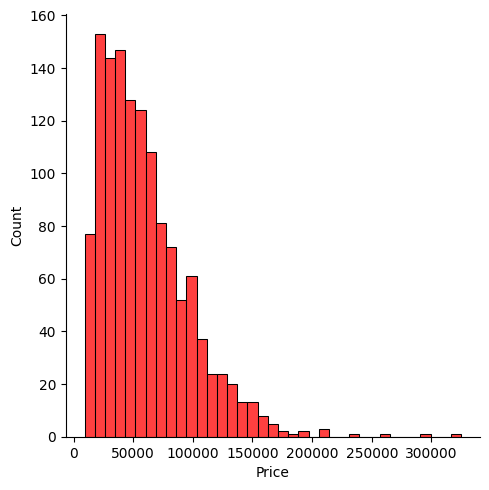

In [264]:
# Exploratory Data Analysis

# Distribution Of Target
sns.displot(data['Price'], color='red')

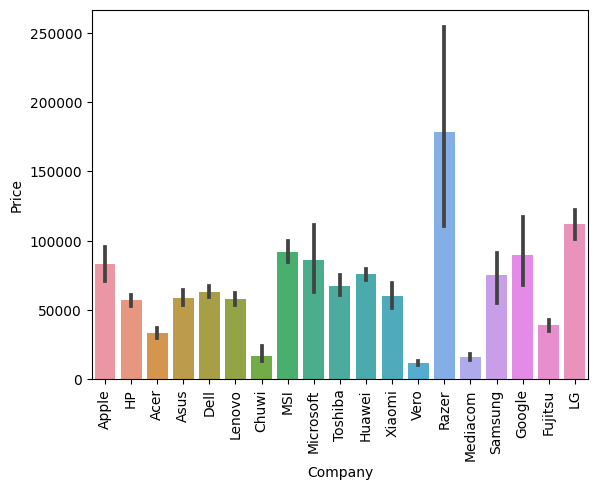

In [265]:
#  Company Column
sns.barplot(x=data['Company'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

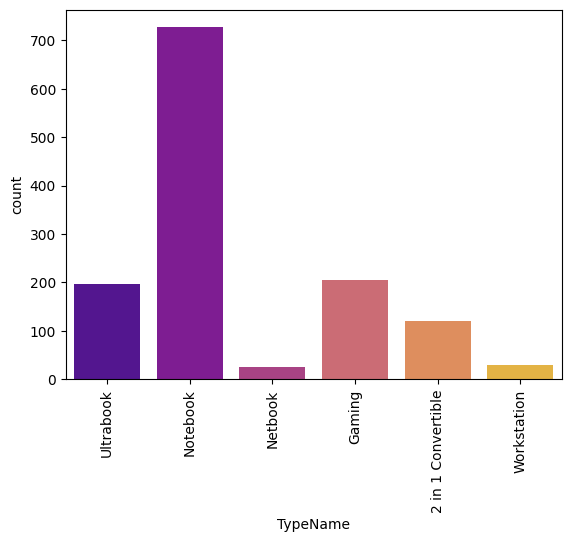

In [266]:
# Laptop Type
sns.countplot(x=data['TypeName'], palette='plasma')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

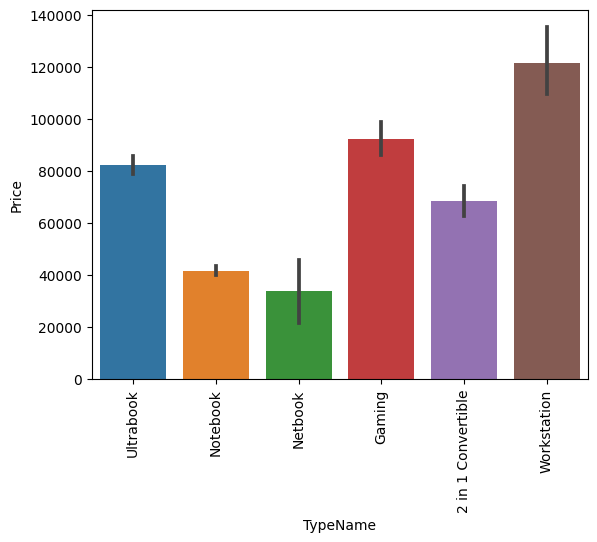

In [267]:
# Laptop Type x Price
sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Inches', ylabel='Price'>

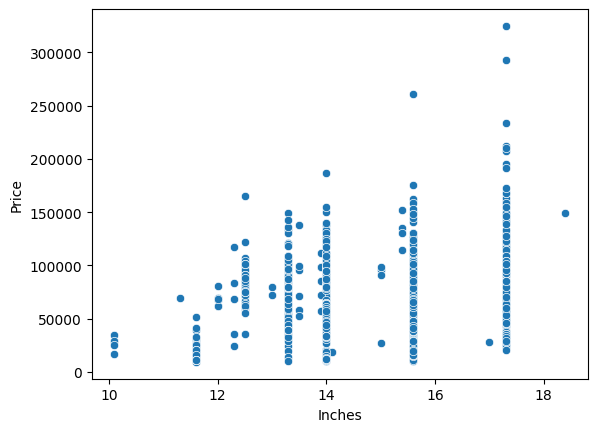

In [268]:
# Inches x Price
sns.scatterplot(x=data['Inches'], y=data['Price'])

<Axes: xlabel='Touchscreen', ylabel='count'>

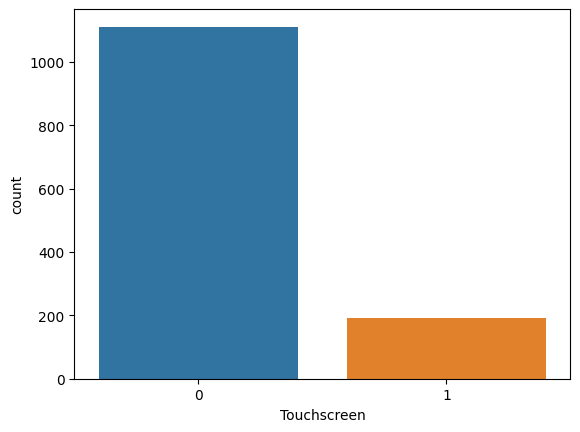

In [269]:
# Screen Resolution Information
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# Laptop Touchscreen
sns.countplot(x=data['Touchscreen'])

<Axes: xlabel='Touchscreen', ylabel='Price'>

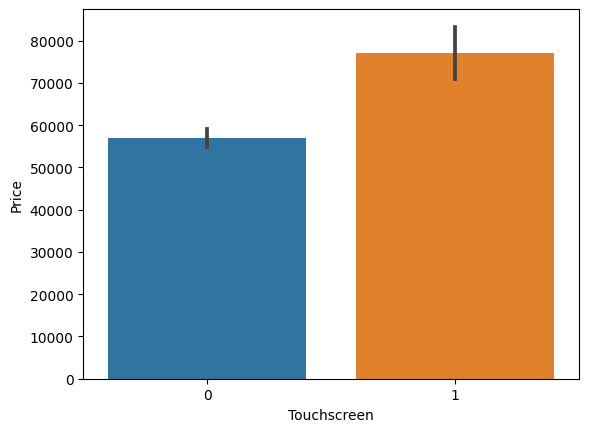

In [270]:
# Touchscreen x Price
sns.barplot(x=data['Touchscreen'], y=data['Price'])

<Axes: xlabel='IPS', ylabel='Price'>

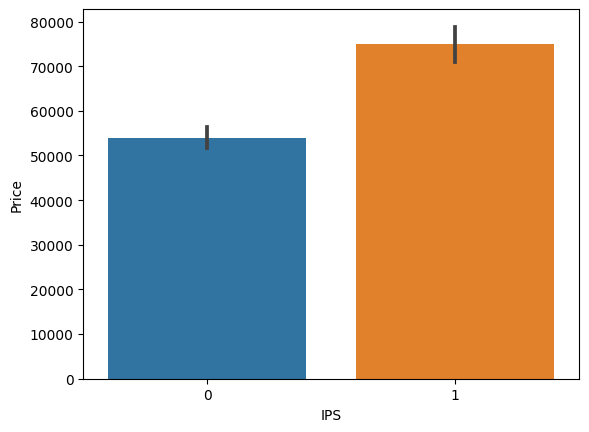

In [271]:
# IPS in Screen Resolution
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['IPS'], y=data['Price'])

<Axes: xlabel='IPS', ylabel='count'>

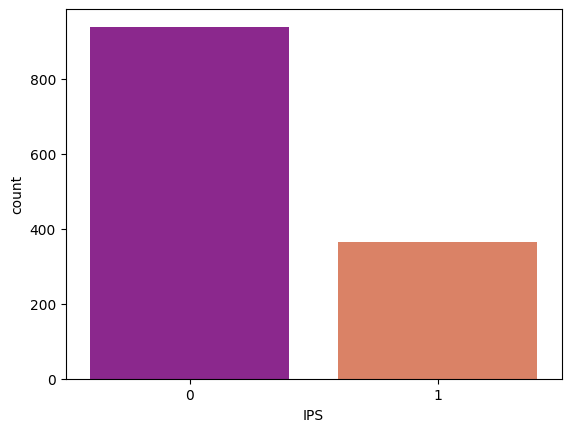

In [272]:
#  Count IPS
sns.countplot(x=data['IPS'], palette='plasma')

In [273]:
# Extract X and Y Resolution
def Xresolution(X_d):
  return X_d.split()[-1].split('x')[0]

def Yresolution(Y_d):
  return Y_d.split()[-1].split('x')[1]

# Find X and Y
data['X_res'] = data['ScreenResolution'].apply(lambda x: Xresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: Yresolution(y))

# Convert to Numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [274]:
# Find Corelation
data.corr()['Price']

C:\Users\User\AppData\Local\Temp\ipykernel_6332\613808820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [275]:
# Calculate PPI Since X and Y Resolution Have a Strong Correlation
data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2)) ** 0.5 / data['Inches']).astype('float')
data.corr()['Price']

C:\Users\User\AppData\Local\Temp\ipykernel_6332\1922068774.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [276]:
data.corr()['Price'].sort_values(ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_6332\72243740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price'].sort_values(ascending=False)


Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
PPI            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [277]:
# Keeping Important Column
data.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace=True)
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
784,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.70,122490.7200,0,0,157.350512
297,Dell,Workstation,Intel Core i7 7820HQ 2.9GHz,16,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42,153705.3408,0,0,127.335675
217,HP,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.6800,0,0,157.350512
406,Toshiba,Ultrabook,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.20,93080.1600,0,0,165.632118
251,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.30,95850.7200,0,0,127.335675


In [278]:
#  CPU Column Extraction
def processor_type(text):
  cpu = " ".join(text.split()[0:3])
  if cpu == 'Intel Core i7' or cpu == 'Intel Core i5' or cpu == 'Intel Core i3':
    return cpu
  elif cpu.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'

data['CPU_Name'] = data['Cpu'].apply(lambda x: processor_type(x))
data.sample(7)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name
1066,Asus,Gaming,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.00,0,1,127.335675,Intel Core i7
968,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167778.72,0,1,127.335675,Intel Core i7
100,HP,Notebook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon 530,Windows 10,1.91,38308.32,0,0,141.211998,Intel Core i7
599,Dell,Workstation,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M620,Windows 10,2.06,93932.64,1,0,141.211998,Intel Core i7
268,HP,Notebook,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,54239.04,0,0,127.335675,Intel Core i7
318,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,52214.40,0,0,157.350512,Intel Core i5
452,HP,Workstation,Intel Core i7 7820HQ 2.9GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,2.31,81731.52,0,1,141.211998,Intel Core i7


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

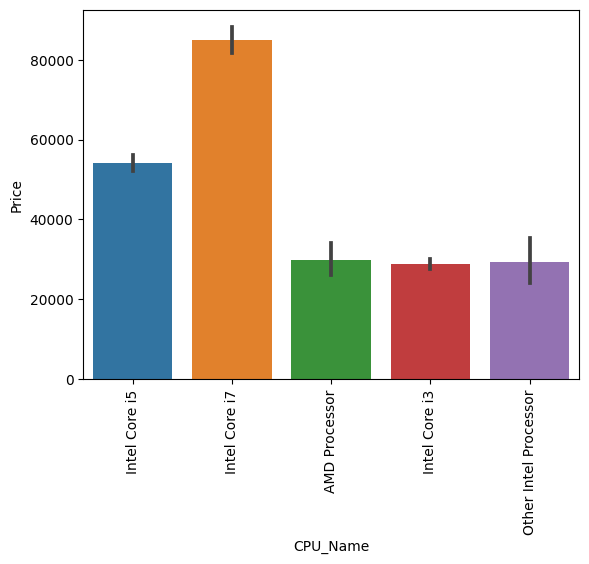

In [279]:
# CPU x Laptop Price
sns.barplot(x=data['CPU_Name'], y=data['Price'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Ram', ylabel='Price'>

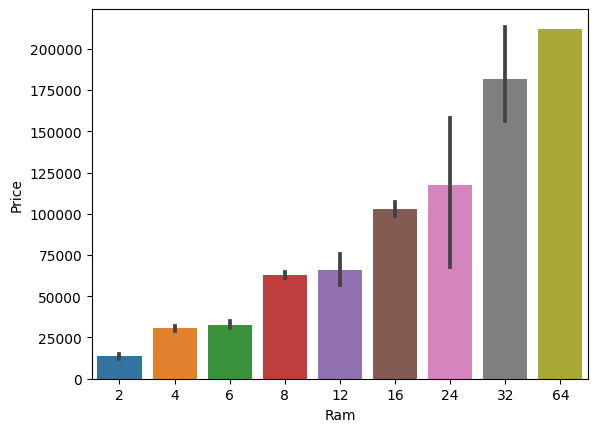

In [280]:
# Ram x Latop Price
sns.barplot(x=data['Ram'], y=data['Price'])

In [281]:
# Memory Column
# We Have to Separate Different Categories and Variation
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [282]:
#  4 Most Common Observed: SSD, HDD, Flash, Hybrid
#  Remove Decimal Such as 1.0 -> 1
data['Memory'] = data['Memory'].astype(str).replace(r'\.0', '', regex=True)

# Replace GB Word With:
data['Memory'] = data['Memory'].str.replace('GB', '')

# Replace TB Word With:
data['Memory'] = data['Memory'].str.replace('TB', '000')

# Split the Word Accross '+' Character
new_data = data['Memory'].str.split("+", n=1, expand=True)

new_data

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [283]:
# Input Column 0 From new_data to data
data['first'] = new_data[0]
data['first'] = data['first'].str.strip()
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [284]:
# Flag for Disk Type
def applyChanges(value):
  data['Layer1'+ value] = data['first'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD', 'SSD', 'Flash Storage', 'Hybrid']
for value in listtoapply:
  applyChanges(value)

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,1,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [285]:
data.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid
787,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,4,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,53226.7200,0,1,141.211998,Intel Core i7,1000 HDD,1,0,0,0
1013,HP,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256 SSD,Intel HD Graphics 520,Windows 10,1.54,100550.5488,0,0,157.350512,Intel Core i7,256 SSD,0,1,0,0
605,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256 SSD + 2000 HDD,Nvidia GeForce GTX 1060,Windows 10,1.80,122490.7200,0,0,282.423996,Intel Core i7,256 SSD,0,1,0,0
952,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,8,256 SSD,Intel HD Graphics 520,Windows 7,1.20,77788.8000,0,0,165.632118,Intel Core i5,256 SSD,0,1,0,0
252,Asus,Notebook,AMD A9-Series 9420 3GHz,4,1000 HDD,AMD Radeon R5 M420,Windows 10,1.68,24988.3200,0,0,100.454670,AMD Processor,1000 HDD,1,0,0,0
1154,Dell,Notebook,Intel Core i5 6300HQ 2.3GHz,8,256 SSD,Nvidia GeForce 960M,Windows 10,2.04,119916.2304,1,1,282.423996,Intel Core i5,256 SSD,0,1,0,0
267,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,4,1000 HDD,Intel HD Graphics 620,No OS,2.20,24881.7600,0,0,141.211998,Intel Core i5,1000 HDD,1,0,0,0
303,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,2000 HDD,Nvidia GeForce 940MX,No OS,2.20,29250.7200,0,0,100.454670,Intel Core i5,2000 HDD,1,0,0,0
1277,Acer,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,500 HDD,Intel HD Graphics 400,Linux,2.40,15397.9200,0,0,100.454670,Other Intel Processor,500 HDD,1,0,0,0
428,HP,Gaming,Intel Core i7 7700HQ 2.8GHz,12,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,3.35,106506.7200,0,0,127.335675,Intel Core i7,256 SSD,0,1,0,0


In [286]:
# Remove Character and Keep Number
data['first'] = data['first'].str.replace(r'\D','')
data['first'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_6332\973686179.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [287]:
# Treat for Second Column (1)
data['second'] = new_data[1]
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,1,0,None
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [288]:
# Flag for Disk Type
def applyChanges1(value):
  data['Layer2'+ value] = data['second'].apply(lambda x:1 if value in x else 0)

data['second'] = data['second'].fillna('0')
listtoapply = ['HDD', 'SSD', 'Flash Storage', 'Hybrid']
for value in listtoapply:
  applyChanges1(value)

# Remove Character and Keep Number
data['second'] = data['second'].str.replace(r'\D','')
data['second'].value_counts()

data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_6332\1181017027.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D','')


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second,Layer2HDD,Layer2SSD,Layer2Flash Storage,Layer2Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,0,1,0,0,0,0,0,0,0


In [289]:
data.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second,Layer2HDD,Layer2SSD,Layer2Flash Storage,Layer2Hybrid
52,HP,Notebook,AMD A6-Series 9220 2.5GHz,4,256 SSD,AMD Radeon R4 Graphics,Windows 10,1.86,21231.5472,0,...,256,0,1,0,0,0,0,0,0,0
1158,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,8,1000 Hybrid,AMD Radeon R5 M330,Windows 10,2.50,42010.7472,0,...,1000,0,0,0,1,0,0,0,0,0
116,HP,Notebook,Intel Core i7 8550U 1.8GHz,8,512 SSD,Intel UHD Graphics 620,Windows 10,1.63,57755.5200,0,...,512,0,1,0,0,0,0,0,0,0
1279,Lenovo,Notebook,Intel Core i7 6700HQ 2.6GHz,8,1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.7200,0,...,1000,1,0,0,0,0,0,0,0,0
523,HP,Notebook,Intel Core i3 6006U 2GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.63,36709.9200,0,...,128,0,1,0,0,0,0,0,0,0
1283,Asus,Notebook,Intel Core i7 6500U 2.5GHz,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,...,500,1,0,0,0,0,0,0,0,0
1288,Asus,Notebook,Intel Celeron Dual Core N3050 1.6GHz,4,500 HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0,...,500,1,0,0,0,0,0,0,0,0
488,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512 SSD,Intel HD Graphics 620,Windows 10,1.36,95797.4400,0,...,512,0,1,0,0,0,0,0,0,0
720,Lenovo,Ultrabook,Intel Core i7 6500U 2.5GHz,8,512 SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,0,...,512,0,1,0,0,0,0,0,0,0
1050,Lenovo,Notebook,Intel Core i7 6600U 2.6GHz,16,256 SSD,Intel HD Graphics 520,Windows 7,1.10,139593.6000,0,...,256,0,1,0,0,0,0,0,0,0


In [290]:
data['second'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [291]:
data['first'] = data['first'].astype('int')
data['second'] = data['second'].astype('int')

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,Layer1HDD,Layer1SSD,Layer1Flash Storage,Layer1Hybrid,second,Layer2HDD,Layer2SSD,Layer2Flash Storage,Layer2Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256,0,1,0,0,0,0,0,0,0


In [292]:
# Multiplying The Elements and Storing The Result in Subsequent Columns
data['HDD'] = (data['first']*data['Layer1HDD'] + data['second']*data['Layer2HDD'])
data['SSD'] = (data['first']*data['Layer1SSD'] + data['second']*data['Layer2SSD'])
data['Hybrid'] = (data['first']*data['Layer1Hybrid'] + data['second']*data['Layer2Hybrid'])
data['Flash_Storage'] = (data['first']*data['Layer1Flash Storage'] + data['second']*data['Layer2Flash Storage'])

# Drop Uncessary Column
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash Storage'], inplace=True)

data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,Flash_Storage
1220,Lenovo,Notebook,Intel Core i7 6600U 2.6GHz,8,256 SSD,Intel HD Graphics 520,Windows 10,2.30,81465.120,0,1,141.211998,Intel Core i7,0,256,0,0
495,Lenovo,Ultrabook,Intel Core i5 6200U 2.3GHz,8,180 SSD,Intel HD Graphics 520,Windows 10,1.30,58554.720,0,1,125.367428,Intel Core i5,0,180,0,0
974,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.73,109218.672,0,0,127.335675,Intel Core i7,1000,256,0,0
1186,Dell,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,16,512 SSD,Intel HD Graphics 620,Windows 10,2.09,62817.120,1,0,141.211998,Intel Core i7,0,512,0,0
281,Dell,Notebook,Intel Core i3 6006U 2.0GHz,4,1000 HDD,AMD Radeon R5 M430,Linux,2.25,22803.840,0,0,141.211998,Intel Core i3,1000,0,0,0


In [293]:
# Drop Memory Column
data.drop(columns=['Memory'], inplace=True)
data.sample(5)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,Flash_Storage
965,Dell,Notebook,Intel Core i3 6006U 2.0GHz,4,AMD Radeon R5 M430,Linux,2.25,24808.2336,0,0,100.454670,Intel Core i3,1000,0,0,0
1250,Dell,Notebook,Intel Pentium Quad Core N3710 1.6GHz,4,Intel HD Graphics,Linux,2.20,17262.7200,0,0,100.454670,Other Intel Processor,500,0,0,0
626,Mediacom,Notebook,Intel Atom x5-Z8350 1.44GHz,2,Intel HD Graphics,Windows 10,1.40,12733.9200,0,0,157.350512,Other Intel Processor,0,0,0,32
304,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,8,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,67399.2000,0,0,141.211998,Intel Core i7,1000,128,0,0
50,Lenovo,2 in 1 Convertible,Intel Atom x5-Z8550 1.44GHz,4,Intel HD Graphics 400,Android,0.69,16996.3200,1,1,224.173809,Other Intel Processor,0,0,0,64


In [294]:
data.corr()['Price']

C:\Users\User\AppData\Local\Temp\ipykernel_6332\736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [295]:
data.drop(columns='Hybrid', inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0
